<a href="https://colab.research.google.com/github/amit-420/py2048/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment3 Basic Tasks 1,2.

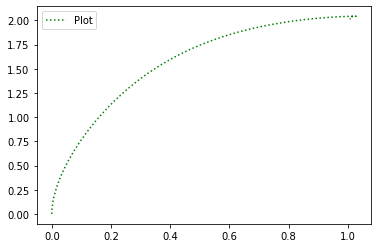

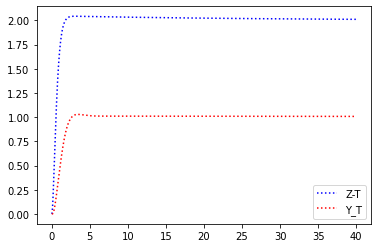

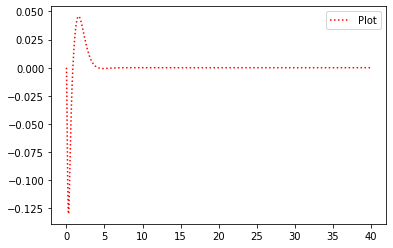

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
'''
The 2D quadcoptor model can be modelled as:

z'' = -g + (u1/m) * cos(phi)Q                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

y'' = -(u1/m) * sin(phi)

phi'' = u2 * 1/ I_xx

The values of the drone are picked up from the Aerial Robotics Course.
'''
##--------QUADROTOR MODEL-----------###

class Quadrotor:
    
    
    def __init__(self):
        super().__init__()
        self.MASS = 0.1800
        self.GRAVITY = 9.81
        self.Ixx = 0.00025
        self.maxF = 3.5316
        self.minF = 0.0
        self.initial_state = [0,0,0,0,0,0]          #the initial state vector contains all the state and their dervitaive
                                                    #The self.initial_state wil be a 1*6 vector.
        self.current_state = self.initial_state
    
    def dynamics(self,state,t,u):
        z,y,phi,zdot,ydot,phidot = state    #Unpack the state vector
        u1 , u2 = u                         #Unpack the input vector 'u' into thrust and moment vectors
    
        # state_derivative = [zdot, ydot, phidot, 
        #                     -self.GRAVITY + (u1/self.MASS) * 1,
        #                     -(u1/self.MASS)*(phi), 
        #                     u2/self.Ixx]
        
        state_derivative = [zdot, ydot, phidot, 
                            -self.GRAVITY + (u1/self.MASS) * 1,
                            -(u1/self.MASS)*(phi), 
                            u2/self.Ixx]
                                            #Writing the derivative function as per the quadc model for odeint
        return state_derivative
    
def simulate(TUNING_MATRIX,t):
    solvedState = Drone.initial_state
    timepoints = len(t)
    Kp_z, Kd_z , Ki_z = TUNING_MATRIX[0,:]
    Kp_y, Kd_y , Ki_y = TUNING_MATRIX[1,:]
    Kp_th, Kd_th , Ki_th = TUNING_MATRIX[2,:]
    int_e_z = 0
    int_e_y = 0
    int_e_th = 0
    
    for i in range(1,timepoints):
        
        int_e_z += (des_state[0]-Drone.current_state[0])
        u1 = Drone.MASS * ( Drone.GRAVITY + 
                            Kd_z * (des_state[2] - Drone.current_state[3]) +
                            Kp_z * (des_state[0] - Drone.current_state[0]) + #y'' = -(u1/m) * sin(phi)
                            Ki_z * (int_e_z)
                            )
        int_e_y += (des_state[1]-Drone.current_state[1])
        phi_c = (-1/Drone.GRAVITY) * (Kd_y * (des_state[3] - Drone.current_state[4]) +
                                      Kp_y * (des_state[1] - Drone.current_state[1]) +
                                      Ki_y * (int_e_y))
        int_e_th += (des_state[1]-Drone.current_state[1])    
        u2 = Drone.Ixx * (Kd_th * (-1 * Drone.current_state[5]) +
                          Kp_th * (phi_c - Drone.current_state[2]) +
                          Ki_th * (int_e_th))  #phi'' = u2 * 1/ I_xx  z'' = -g + (u1/m) * cos(phi)Q  
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

        u = [u1,u2]  #The input vector 'u' into thrust and moment vectors
                 
        # temp = odeint(self.dynamics,self.current_state,t,args=(u[i],))
        # self.current_state = temp[1,:]
        Drone.current_state = odeint(Drone.dynamics,Drone.current_state,t,args=(u,))[1,:]
        #solvedState = np.append(solvedState,Drone.current_state, axis=0)
        solvedState = np.vstack((solvedState,Drone.current_state))
        
    return solvedState

def plotResults(solvedState,t):
    
    plt.plot(solvedState[:,1],solvedState[:,0],'g:',label = 'Plot')
    plt.legend()
    plt.show()

    plt.plot(t,solvedState[:,0],'b:',label = 'Z-T')
    plt.plot(t,solvedState[:,1],'r:',label = 'Y_T')
    plt.legend()
    plt.show()
    
    plt.plot(t,solvedState[:,2],'r:',label = 'Plot')
    plt.legend()
    plt.show()
    return None
    
# Simulation Time Parameters
simulation_time = 40 # seconds
time_points = simulation_time * 100 + 1
t = np.linspace(0,simulation_time,time_points)


des_state = np.array([2,1,0,0,0,0]) # z,y,zdot,ydot,zdotdot,y dotdot

Drone = Quadrotor()
TUNING_MATRIX = np.array([
    [8.5,5.5,0.003], #z
    [1.619,1.98,0.001], #y
    [117,17,0.01]  #phi
])

solvedState = simulate(TUNING_MATRIX,t)

plotResults(solvedState,t)

        

Assignment3 Basic Tasks:3-5 & Advance Task:1-2

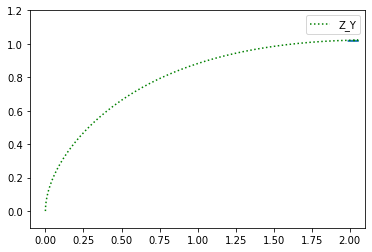

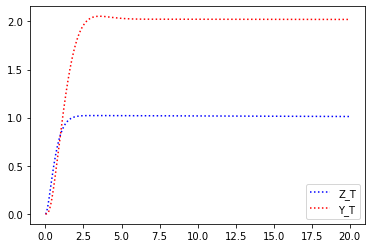

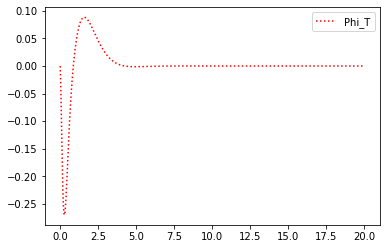

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math
import matplotlib.animation as animation 

'''
The 2D quadcoptor model can be modelled as:

z'' = -g + (u1/m) * cos(phi)Q                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

y'' = -(u1/m) * sin(phi)

phi'' = u2 * 1/ I_xx

The values of the drone are picked up from the Aerial Robotics Course.
'''
##--------QUADROTOR MODEL-----------###

class Quadrotor:
    
    
    def __init__(self):
        super().__init__()
        self.MASS = 0.1800
        self.GRAVITY = 9.81
        self.Ixx = 0.00025
        self.maxF = 3.5316
        self.minF = 0.0
        self.initial_state = [0,0,0,0,0,0]          #the initial state vector contains all the state and their dervitaive
                                                    #The self.initial_state wil be a 1*6 vector.
        self.current_state = self.initial_state
    
    def dynamics(self,state,t,u):
        z,y,phi,zdot,ydot,phidot = state    #Unpack the state vector
        u1 , u2 = u                         #Unpack the input vector 'u' into thrust and moment vectors
    
        # state_derivative = [zdot, ydot, phidot, 
        #                     -self.GRAVITY + (u1/self.MASS) * 1,
        #                     -(u1/self.MASS)*(phi), 
        #                     u2/self.Ixx]

        state_derivative = [zdot, ydot, phidot, 
                            -self.GRAVITY + (u1/self.MASS) * 1,
                            -(u1/self.MASS)*(phi), 
                            u2/self.Ixx]
                                            #Writing the derivative function as per the quadc model for odeint
        return state_derivative
    
def simulate(TUNING_MATRIX,t):
    solvedState = Drone.initial_state
    timepoints = len(t)
    Kp_z, Kd_z , Ki_z = TUNING_MATRIX[0,:]
    Kp_y, Kd_y , Ki_y = TUNING_MATRIX[1,:]
    Kp_th, Kd_th , Ki_th = TUNING_MATRIX[2,:]
    # ------Added----- # 
    int_e_z = 0
    int_e_y = 0
    int_e_th = 0
    sucess = False
    delta = 0.0075
    #-----------------#

    for i in range(1,timepoints):
        
        int_e_z += (des_state[0]-Drone.current_state[0])
        u1 = Drone.MASS * ( Drone.GRAVITY + 
                            Kd_z * (des_state[2] - Drone.current_state[3]) +
                            Kp_z * (des_state[0] - Drone.current_state[0]) + #y'' = -(u1/m) * sin(phi)
                            Ki_z * (int_e_z)
                            )
        int_e_y += (des_state[1]-Drone.current_state[1])
        phi_c = (-1/Drone.GRAVITY) * (Kd_y * (des_state[3] - Drone.current_state[4]) +
                                      Kp_y * (des_state[1] - Drone.current_state[1]) +
                                      Ki_y * (int_e_y))
        int_e_th += (des_state[1]-Drone.current_state[1])    
        u2 = Drone.Ixx * (Kd_th * (-1 * Drone.current_state[5]) +
                          Kp_th * (phi_c - Drone.current_state[2]) +
                          Ki_th * (int_e_th))  #phi'' = u2 * 1/ I_xx  z'' = -g + (u1/m) * cos(phi)Q 

        #-----changes for Task 3 ----#                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     
        if u1 >= Drone.maxF:
          u1 = Drone.maxF
        #----------------------------#
        u = [u1,u2]  #The input vector 'u' into thrust and moment vectors
        # print(u1)         
        # temp = odeint(self.dynamics,self.current_state,t,args=(u[i],))
        # self.current_state = temp[1,:]
        Drone.current_state = odeint(Drone.dynamics,Drone.current_state,t,args=(u,))[1,:]
        #solvedState = np.append(solvedState,Drone.current_state, axis=0)
        solvedState = np.vstack((solvedState,Drone.current_state))
        
        #---- changes for Advance Task 1 -----#
        if des_state[0] - delta <= Drone.current_state[0] <= des_state[0]+ delta and des_state[1] - delta <= Drone.current_state[1] <= des_state[1]+ delta:
          sucess = True
        else:
          sucess = False
        
        if sucess == True:
          print('simulation successful')
        # ------------------------------------#
    return solvedState

def plotResults(solvedState,t):
    #----- Changes for Advance Task 2 ------#
    fig = plt.figure()  
    axis = plt.axes(xlim =(-0.1,2.1 ),ylim =(-0.1, 1.2))   
    line, = axis.plot([], [], lw = 2)
    def init():  
      line.set_data([], [])  
      return line,    
    def animate(i):
      angle = solvedState[i,2]
      l_cos = 0.03*np.cos(angle)
      l_sin = 0.03*np.sin(angle)
      line.set_data([solvedState[i,1]- l_cos,solvedState[i,1]+ l_cos],[solvedState[i,0] - l_sin,solvedState[i,0] + l_sin])
      return line,

    anim = animation.FuncAnimation(fig, animate,init_func = init, frames = 900, 
                            interval = 10,  
                            blit = True)
    anim.save('2DDrone.mp4', writer = 'ffmpeg', fps = 30)
    #---------------------------------------#
    
    plt.plot(solvedState[:,1],solvedState[:,0],'g:',label = 'Z_Y')
    plt.legend()
    plt.show()

    plt.plot(t,solvedState[:,0],'b:',label = 'Z_T')
    plt.plot(t,solvedState[:,1],'r:',label = 'Y_T')
    plt.legend()
    plt.show()
    
    plt.plot(t,solvedState[:,2],'r:',label = 'Phi_T')
    plt.legend()
    plt.show()
    return None
    
# Simulation Time Parameters
simulation_time = 20 # seconds
time_points = simulation_time * 100 + 1
t = np.linspace(0,simulation_time,time_points)


des_state = np.array([1,2,0,0,0,0]) # z,y,zdot,ydot,zdotdot,y dotdot

Drone = Quadrotor()
TUNING_MATRIX = np.array([
    [8.5,5.5,0.003], #z
    [1.619,1.98,0.001], #y
    [117,17,0.01]  #phi
])

solvedState = simulate(TUNING_MATRIX,t)

plotResults(solvedState,t)

        